# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [2]:
import zipfile
from zipfile import ZipFile
from PIL import Image, ImageDraw, ImageFont
import pytesseract
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# the rest is up to you!

Open Zip File and set up basic dictionaries for later use:

In [27]:
page_text_dic = {}
page_faces_dic = {}
page_img_dic = {}
font = ImageFont.truetype(r'readonly/fanwood-webfont.ttf', 24) 

with ZipFile('readonly/images.zip', 'r') as img_source:
    p_lst = img_source.infolist()    
    for i in p_lst:
        f = i.filename
        p = img_source.open(i)
        page = Image.open(p).convert('RGB')
        page_img_dic[f] = page
        page_text_dic[f] = ""
        page_faces_dic[f] = "" 
        

# print (p_lst[0])
# test_img = page_img_dic.get('a-0.png')
# display (test_img)
print(page_img_dic)

{'a-0.png': <PIL.Image.Image image mode=RGB size=3600x6300 at 0x12211D668>, 'a-1.png': <PIL.Image.Image image mode=RGB size=3600x6300 at 0x12214A2E8>, 'a-10.png': <PIL.Image.Image image mode=RGB size=6300x3600 at 0x122149F60>, 'a-11.png': <PIL.Image.Image image mode=RGB size=3150x3600 at 0x12214A080>, 'a-12.png': <PIL.Image.Image image mode=RGB size=3150x3600 at 0x12214A0B8>, 'a-13.png': <PIL.Image.Image image mode=RGB size=3150x3600 at 0x1241F09E8>, 'a-2.png': <PIL.Image.Image image mode=RGB size=3600x6300 at 0x1241F0C88>, 'a-3.png': <PIL.Image.Image image mode=RGB size=7200x6300 at 0x1241F0CC0>, 'a-4.png': <PIL.Image.Image image mode=RGB size=3600x6300 at 0x1241F03C8>, 'a-5.png': <PIL.Image.Image image mode=RGB size=3600x6300 at 0x1241F02E8>, 'a-6.png': <PIL.Image.Image image mode=RGB size=3600x6300 at 0x12202E550>, 'a-7.png': <PIL.Image.Image image mode=RGB size=3150x3600 at 0x12202E780>, 'a-8.png': <PIL.Image.Image image mode=RGB size=3150x3600 at 0x12202E668>, 'a-9.png': <PIL.Imag

Proceed with "page to text" and save the strings in page_text_dic:

In [28]:
for k, v in page_img_dic.items():
    text = pytesseract.image_to_string(v)
    page_text_dic[k] = text

print (page_text_dic)

{'a-0.png': "Ann Arbor, Michigan\n\nWednesday, November 5, 2014\n\nChe Michigan Daily\n\nmichigandaily.com\n\nBIG DAY FOR REPUBLICANS\n\nSNYDER EARNS SECOND TERM; G.O.P. TAKES CONTROL OF U.S. SENATE\n\nSTATE\n\nEXECUTIVE\nGOVERNOR\nRick Snyder (R)\n\nLIEUTENANT\nGOVERNOR\nBrian Calley (R)\n\nSECRETARY OF\nSTATE\nRuth Johnson CR)\n\nSTATE\nJUDICIAL\n\nATTORNEY GENERAL\nBill Schuette CR)\n\nMICHIGAN\nLEGISLATIVE\n\nMICHIGAN STATE\nSENATE\nRebekah Warren (D)\n\nMICHIGAN HOUSE\nOF REPRESENTATIVES\nJeff Irwin CD)\n\nU.S.\nLEGISLATIVE\n\nU.S. SENATE\nGary Peters (D)\n\nU.S. HOUSE OF\nREPRESENTATIVES\nDebbie Dingell (D)\n\nWASHTENAW\nCOUNTY\n\nPROBATE COURT\nJulia Owdziej (D)\n\nCIRCUIT COURT\nPatrick Conlin (D)\n\nANN ARBOR\nMAYOR\nChristopher Taylor (D)\n\nCITY COUNCIL\n\nSumi Kailasapathy (D)\nChuck Warpehoski (D)\nJulie Grand (D)\nGraydon Kraphol (D)\nKirk Westphal (D)\n\nREGENTS\n\nToo close to call\n\nHI: 51\nLO: 30\n\nWEATHER\nTOMORROW\n\n \n\nTOP: Republican Gov. Rick Snyder celebrate

Proceed with "page to face" and save the face images in page_faces_dic:

In [29]:
for k, v in page_img_dic.items():
    face_lst = []
    cv_img = np.array(v)
    cv_img_gray = cv.cvtColor(cv_img, cv.COLOR_BGR2GRAY)
    face_frames = face_cascade.detectMultiScale(cv_img_gray, 1.3, 5)
    
    for x, y, w, h in face_frames:
        face = v.crop((x,y,x+w,y+h))
        face.thumbnail((100, 100) )
        face_lst.append(face)
    
    page_faces_dic[k] = face_lst

print (page_faces_dic.get('a-1.png'))

[<PIL.Image.Image image mode=RGB size=100x100 at 0x1242056D8>, <PIL.Image.Image image mode=RGB size=100x100 at 0x124205748>, <PIL.Image.Image image mode=RGB size=51x51 at 0x1242057B8>, <PIL.Image.Image image mode=RGB size=61x61 at 0x124205940>, <PIL.Image.Image image mode=RGB size=51x51 at 0x1242059B0>]


Define a function to return contact sheet:

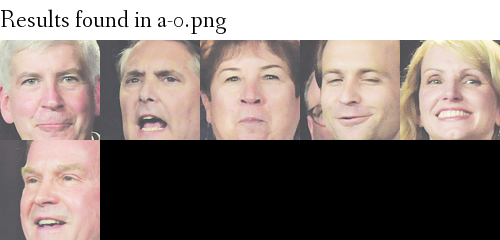

In [30]:
def face_results(filename):
    x=0
    y=0
    f_img_lst = page_faces_dic.get(filename)
    if not f_img_lst:
        # "results found in file but there were no faces in that file!"
        face_no_res_label =Image.new("RGB", (500,80), (255, 255, 255))
        no_res = "Results found in {}\n\nBut there were no faces found in that file!".format(filename)
        f_d = ImageDraw.Draw(face_no_res_label)
        f_d.text((0, 10),no_res,(0,0,0), font = font)
        return face_no_res_label
        display(face_no_res_label)
    else:
        face_res_label =Image.new("RGB", (500,40), (255, 255, 255))
        res = "Results found in {}".format(filename)
        f_d = ImageDraw.Draw(face_res_label)
        f_d.text((0, 10),res,(0,0,0), font = font)
        if len(f_img_lst) % 5 < 1:
            h = 100 * (len(f_img_lst) // 5)
        else:
            h = 100 * (len(f_img_lst) // 5 + 1)
        face_res =Image.new("RGB", (500,h))
        f_1 = f_img_lst[0]
        for i in f_img_lst:    
            face_res.paste(i, (x, y))
            if x+f_1.width == face_res.width:
                x=0
                y=y + f_1.height
            else:
                x=x + f_1.width
        face_result =Image.new("RGB", (500,face_res.height + face_res_label.height))
        face_result.paste(face_res_label, (0, 0))
        face_result.paste(face_res, (0, face_res_label.height))
        return (face_result)
    


a = 'a-0.png'    
face_results(a)

Define a function that would combine all result images into one image:

In [35]:
def search():
    print("Search for images: ")
    query = input () 
    f_lst = []
    for k, v in page_text_dic.items():
        if query in v:
            f_lst.append(k)
    if len(f_lst) == 0:
        print ("no result in newspaper files")
        return
    else:
        result_img_lst = []
        for i in f_lst:
            r = face_results(i)
            result_img_lst.append(r)
        combined_h = 0
        x = 0
        y = 0
        r_1 = result_img_lst[0]
        for i in result_img_lst:
            combined_h += i.height
            results_img = Image.new("RGB", (500,combined_h))
        for i in result_img_lst:    
            results_img.paste(i, (x, y))
            y += i.height
        return results_img
        

Search for images: 
Mark


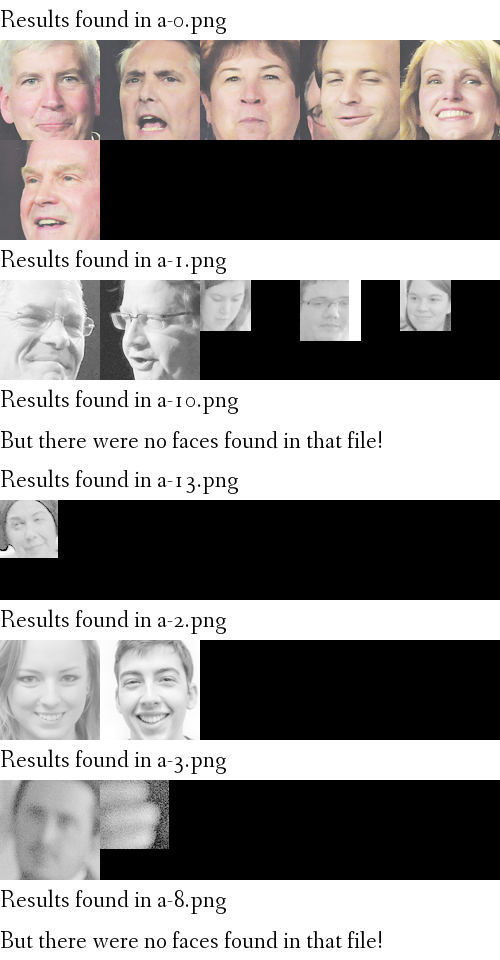

In [36]:
search()

Search for images: 
Christopher


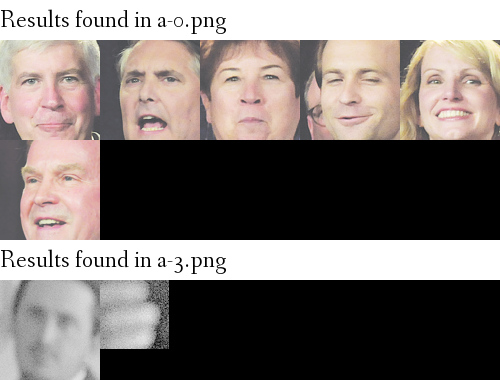

In [37]:
search()

Search for images: 
hard


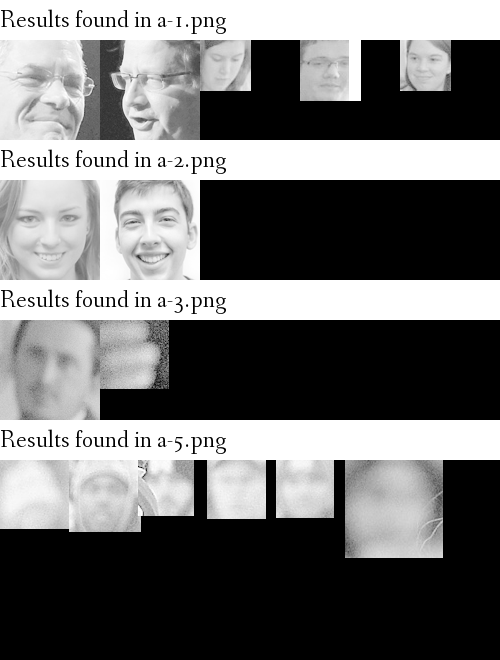

In [38]:
search()